In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
drugs_2016 = pd.read_csv('../Data/state-drug-utilization-data-2016.csv')
drugs_2017 = pd.read_csv('../Data/state-drug-utilization-data-2017.csv')
drugs_2018 = pd.read_csv('../Data/state-drug-utilization-data-2018.csv')
drugs_2019 = pd.read_csv('../Data/state-drug-utilization-data-2019.csv')
drugs_2020 = pd.read_csv('../Data/state-drug-utilization-data-2020.csv')

F:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
drugs_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4671847 entries, 0 to 4671846
Data columns (total 15 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Utilization Type                object 
 1   State                           object 
 2   NDC                             int64  
 3   Labeler Code                    int64  
 4   Product Code                    int64  
 5   Package Size                    int64  
 6   Year                            int64  
 7   Quarter                         int64  
 8   Suppression Used                bool   
 9   Product Name                    object 
 10  Units Reimbursed                float64
 11  Number of Prescriptions         float64
 12  Total Amount Reimbursed         float64
 13  Medicaid Amount Reimbursed      float64
 14  Non Medicaid Amount Reimbursed  float64
dtypes: bool(1), float64(5), int64(6), object(3)
memory usage: 503.5+ MB


In [6]:
mortality = pd.read_csv('../Data/drug-mortality-2016.csv')

In [7]:
mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    450 non-null    int64  
 1   STATE   450 non-null    object 
 2   RATE    450 non-null    float64
 3   DEATHS  450 non-null    int64  
 4   URL     450 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 17.7+ KB


In [8]:
mortality_2016 = mortality[(mortality['YEAR'] == 2016)]
mortality_2017 = mortality[(mortality['YEAR'] == 2017)]
mortality_2018 = mortality[(mortality['YEAR'] == 2018)]
mortality_2019 = mortality[(mortality['YEAR'] == 2019)]
mortality_2020 = mortality[(mortality['YEAR'] == 2020)]

In [9]:
#Starting by looking at what states have the highest and lowest mortality rate and amount of deaths
#Then begin research on narcotics to gain information about legally perscribed amounts.
mortality_2016.nlargest(5, 'RATE')

,YEAR,STATE,RATE,DEATHS,URL
247,2016,WV,52.0,884,/nchs/pressroom/states/westvirginia/westvirgin...
234,2016,OH,39.1,4329,/nchs/pressroom/states/ohio/ohio.htm
228,2016,NH,39.0,481,/nchs/pressroom/states/newhampshire/newhampshi...
237,2016,PA,37.9,4627,/nchs/pressroom/states/pennsylvania/pennsylvan...
216,2016,KY,33.5,1419,/nchs/pressroom/states/kentucky/kentucky.htm


In [10]:
mortality_2016.nlargest(5, 'DEATHS')

,YEAR,STATE,RATE,DEATHS,URL
208,2016,FL,23.7,4728,/nchs/pressroom/states/florida/florida.htm
204,2016,CA,11.2,4654,/nchs/pressroom/states/california/california.htm
237,2016,PA,37.9,4627,/nchs/pressroom/states/pennsylvania/pennsylvan...
234,2016,OH,39.1,4329,/nchs/pressroom/states/ohio/ohio.htm
231,2016,NY,18.0,3638,/nchs/pressroom/states/newyork/newyork.htm


In [11]:
mortality_2016.nsmallest(5, 'RATE')

,YEAR,STATE,RATE,DEATHS,URL
226,2016,NE,6.4,120,/nchs/pressroom/states/nebraska/nebraska.htm
240,2016,SD,8.4,69,/nchs/pressroom/states/southdakota/southdakota...
242,2016,TX,10.1,2831,/nchs/pressroom/states/texas/texas.htm
214,2016,IA,10.6,314,/nchs/pressroom/states/iowa/iowa.htm
233,2016,ND,10.6,77,/nchs/pressroom/states/northdakota/northdakota...


In [12]:
mortality_2016.nsmallest(5, 'DEATHS')

,YEAR,STATE,RATE,DEATHS,URL
240,2016,SD,8.4,69,/nchs/pressroom/states/southdakota/southdakota...
233,2016,ND,10.6,77,/nchs/pressroom/states/northdakota/northdakota...
249,2016,WY,17.6,99,/nchs/pressroom/states/wyoming/wyoming.htm
225,2016,MT,11.7,119,/nchs/pressroom/states/montana/montana.htm
226,2016,NE,6.4,120,/nchs/pressroom/states/nebraska/nebraska.htm


In [13]:
drugs_2016.dropna()
drugs_2017.dropna()
drugs_2018.dropna()
drugs_2019.dropna()
drugs_2020.dropna()

,Utilization Type,State,NDC,Labeler Code,Product Code,Package Size,Year,Quarter,Supression Used,Product Name,Units Reimbursed,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed
2601,FFSU,AK,9540001,9,5400,1.0,2020,4,False,NICOTROL,6108.0,37.0,15312.05,15312.05,0.00
2602,FFSU,AK,13107015730,13107,157,30.0,2020,1,False,PAROXETINE,592.0,14.0,266.58,266.58,0.00
2604,FFSU,AK,50458057990,50458,579,90.0,2020,2,False,XARELTO,3977.0,126.0,60621.75,60621.75,0.00
2608,FFSU,AK,16729021716,16729,217,16.0,2020,3,False,SERTRALINE,317.0,13.0,210.94,210.94,0.00
2611,FFSU,AK,603459315,603,4593,15.0,2020,1,False,METHYLPRED,399.0,19.0,306.27,306.27,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880124,FFSU,CO,591544305,591,5443,5.0,2020,1,False,PREDNISONE,66208.0,5691.0,57993.60,57988.38,5.22
4880125,MCOU,LA,338055318,338,553,18.0,2020,4,False,SODIUM CHL,30450.0,74.0,1589.86,1589.86,0.00
4880132,MCOU,NY,42192013612,42192,136,12.0,2020,4,False,SODIUM SUL,27215.6,80.0,10298.14,10298.14,0.00
4880133,MCOU,NY,57664050183,57664,501,83.0,2020,4,False,MIRTAZAPIN,2942.0,97.0,559.22,559.22,0.00


In [14]:
drugs_2016 = drugs_2016.astype({'Product Name':'string'})
drugs_2017 = drugs_2017.astype({'Product Name':'string'})
drugs_2018 = drugs_2018.astype({'Product Name':'string'})
drugs_2019 = drugs_2019.astype({'Product Name':'string'})
drugs_2020 = drugs_2020.astype({'Product Name':'string'})

In [15]:
#Created a list of opioids and benzodiazepines which are both the most common subset of drugs that 
#are overdosed on. 

searchfor = ['Hydrocodone', 'HYDROCODONE', 'MORPHINE', 'Morphine','FENTANYL','fentanyl','Oxycodone', 'OXYCODONE'
             'Oxymorphone','OXYMORPHONE','CODEINE','Codeine','VICODIN','Vicodin','PERCOCET','Percocet','OPANA','Opana',
             'OXYCONTIN','OxyContin','avinza','AVINZA','METHADONE','Methadone','ALPRAZOLAM','Alprazolam', 'XANAX','xanax'
            ,'clonazepam' 'CLONAZEPAM','KLONOPIN','Klonopin', 'diazepam' , 'DIAZEPAM', 'VALIUM', 'Valium', 
             'lorazepam', 'LORAZEPAM','ATIVAN','Ativan']
opioids_2016 = drugs_2016[drugs_2016["Product Name"].str.contains('|'.join(searchfor))] 
opioids_2017 = drugs_2017[drugs_2017["Product Name"].str.contains('|'.join(searchfor))]
opioids_2018 = drugs_2018[drugs_2018["Product Name"].str.contains('|'.join(searchfor))]
opioids_2019 = drugs_2019[drugs_2019["Product Name"].str.contains('|'.join(searchfor))]
opioids_2020 = drugs_2020[drugs_2020["Product Name"].str.contains('|'.join(searchfor))]

In [16]:
opioids_2016['Product Name'].unique()

<StringArray>
[  'DIAZEPAM', 'KLONOPIN 1',  'LORAZEPAM', 'MORPHINE S',  'METHADONE',
  'Oxycodone', 'ALPRAZOLAM', 'MORPHINE 1', 'FENTANYL C', 'FENTANYL 1',
 ...
  'ATIVAN .5', 'MORPHINE 0', 'OPANA (OXY', 'FENTANYL 8',  'XANAX 1.0',
     'VALIUM',     'AVINZA', 'OPANA 10 M', 'OPANA 10MG',  'AVINZA 90']
Length: 114, dtype: string

In [17]:
opioids_2016.drop(opioids_2016[opioids_2016['State'] == 'XX'].index, inplace = True)
opioids_2017.drop(opioids_2017[opioids_2017['State'] == 'XX'].index, inplace = True)
opioids_2018.drop(opioids_2018[opioids_2018['State'] == 'XX'].index, inplace = True)
opioids_2019.drop(opioids_2019[opioids_2019['State'] == 'XX'].index, inplace = True)
opioids_2020.drop(opioids_2020[opioids_2020['State'] == 'XX'].index, inplace = True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
#Final list of just states and there highly dangerous drug uses
#DC IS LISTED AS A STATE NOT TRUE
opioids_2016.State.unique()

array(['IL', 'KY', 'MN', 'IA', 'MI', 'OH', 'NY', 'FL', 'NM', 'OK', 'GA',
       'VA', 'NC', 'TN', 'PA', 'HI', 'TX', 'CA', 'MD', 'WV', 'IN', 'NJ',
       'AL', 'SC', 'WA', 'NV', 'KS', 'AZ', 'UT', 'LA', 'NH', 'DE', 'DC',
       'MS', 'AR', 'SD', 'ID', 'MO', 'ND', 'CT', 'MA', 'NE', 'CO', 'AK',
       'OR', 'WI', 'RI', 'WY', 'ME', 'VT', 'MT'], dtype=object)

In [19]:
#Total medication count prescribed and covered by medicare in each state based on my list of medications

Total_perscriptions_2016 = opioids_2016.groupby('State')['Number of Prescriptions'].sum()
Total_perscriptions_2017 = opioids_2017.groupby('State')['Number of Prescriptions'].sum()
Total_perscriptions_2018 = opioids_2018.groupby('State')['Number of Prescriptions'].sum()
Total_perscriptions_2019 = opioids_2019.groupby('State')['Number of Prescriptions'].sum()
Total_perscriptions_2020 = opioids_2020.groupby('State')['Number of Prescriptions'].sum()

In [20]:
Total_perscriptions_2016 = Total_perscriptions_2016.reset_index()
Total_perscriptions_2017 = Total_perscriptions_2017.reset_index()
Total_perscriptions_2018 = Total_perscriptions_2018.reset_index()
Total_perscriptions_2019 = Total_perscriptions_2019.reset_index()
Total_perscriptions_2020 = Total_perscriptions_2020.reset_index()

In [21]:
morality_2016 = mortality_2016.merge(Total_perscriptions_2016, left_on='STATE', right_on='State')
morality_2017 = mortality_2017.merge(Total_perscriptions_2017, left_on='STATE', right_on='State')
morality_2018 = mortality_2018.merge(Total_perscriptions_2018, left_on='STATE', right_on='State')
morality_2019 = mortality_2019.merge(Total_perscriptions_2019, left_on='STATE', right_on='State')
morality_2020 = mortality_2020.merge(Total_perscriptions_2020, left_on='STATE', right_on='State')

In [22]:
morality_2016['Perscriptions per Death'] = (morality_2016['Number of Prescriptions'] 
                                            / morality_2016['DEATHS'])
morality_2017['Perscriptions per Death'] = (morality_2017['Number of Prescriptions'] 
                                            / morality_2017['DEATHS'])
morality_2018['Perscriptions per Death'] = (morality_2018['Number of Prescriptions'] 
                                            / morality_2018['DEATHS'])
morality_2019['Perscriptions per Death'] = (morality_2019['Number of Prescriptions'] 
                                            / morality_2019['DEATHS'])
morality_2020['Perscriptions per Death'] = (morality_2020['Number of Prescriptions'] 
                                            / morality_2020['DEATHS'])

In [23]:
morality_2016.nlargest(5, 'Perscriptions per Death')

,YEAR,STATE,RATE,DEATHS,URL,State,Number of Prescriptions,Perscriptions per Death
36,2016,OR,11.9,506,/nchs/pressroom/states/oregon/oregon.htm,OR,327970.0,648.162055
26,2016,NE,6.4,120,/nchs/pressroom/states/nebraska/nebraska.htm,NE,68975.0,574.791667
14,2016,IA,10.6,314,/nchs/pressroom/states/iowa/iowa.htm,IA,160262.0,510.388535
25,2016,MT,11.7,119,/nchs/pressroom/states/montana/montana.htm,MT,58143.0,488.596639
44,2016,VT,22.2,125,/nchs/pressroom/states/vermont/vermont.htm,VT,59596.0,476.768000


In [26]:
worst_states_2016 = morality_2016.nsmallest(5, 'Perscriptions per Death')
worst_states_2017 = morality_2017.nsmallest(5, 'Perscriptions per Death')
worst_states_2018 = morality_2018.nsmallest(5, 'Perscriptions per Death')
worst_states_2019 = morality_2019.nsmallest(5, 'Perscriptions per Death')
worst_states_2020 = morality_2020.nsmallest(5, 'Perscriptions per Death')

In [29]:
top_5_worst_states = worst_states_2016.append(worst_states_2017, ignore_index=True)
top_5_worst_states = top_5_worst_states.append(worst_states_2018, ignore_index=True)
top_5_worst_states = top_5_worst_states.append(worst_states_2019, ignore_index=True)
top_5_worst_states = top_5_worst_states.append(worst_states_2020, ignore_index=True)

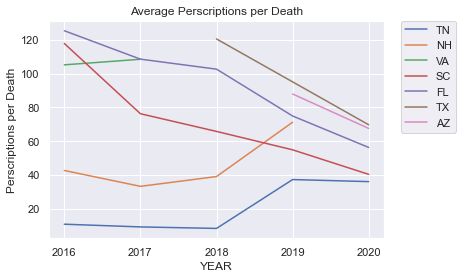

In [63]:
sns.lineplot(data=top_5_worst_states, x="YEAR", y="Perscriptions per Death", hue="STATE").set(title='Average Perscriptions per Death')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set(font_scale=1.2)

In [64]:
SC_worst_5 = top_5_worst_states[(top_5_worst_states['STATE'] == 'SC')]

No handles with labels found to put in legend.


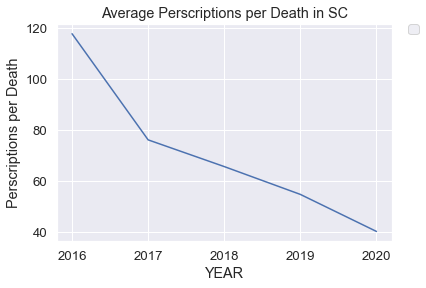

In [66]:
sns.lineplot(data=SC_worst_5 , x="YEAR", y="Perscriptions per Death").set(title='Average Perscriptions per Death in SC')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set(font_scale=1.2)

In [69]:
top_5_worst_states.to_csv(r'C:\Users\dphil\Desktop\da7\projects\Da7-Capstone-Template\Data\Worst States.csv', index=False)

In [70]:
total_drugs_mortality = morality_2016.append(morality_2017, ignore_index=True)
total_drugs_mortality = total_drugs_mortality.append(morality_2018, ignore_index=True)
total_drugs_mortality = total_drugs_mortality.append(morality_2019, ignore_index=True)
total_drugs_mortality = total_drugs_mortality.append(morality_2020, ignore_index=True)

In [72]:
total_drugs_mortality.to_csv(r'C:\Users\dphil\Desktop\da7\projects\Da7-Capstone-Template\Data\Total States.csv', index=False)

In [73]:
total_drugs_mortality

,YEAR,STATE,RATE,DEATHS,URL,State,Number of Prescriptions,Perscriptions per Death
0,2016,AL,16.2,756,/nchs/pressroom/states/alabama/alabama.htm,AL,166764.0,220.587302
1,2016,AK,16.8,128,/nchs/pressroom/states/alaska/alaska.htm,AK,43788.0,342.093750
2,2016,AZ,20.3,1382,/nchs/pressroom/states/arizona/arizona.htm,AZ,441006.0,319.107091
3,2016,AR,14.0,401,/nchs/pressroom/states/arkansas/arkansas.htm,AR,122516.0,305.526185
4,2016,CA,11.2,4654,/nchs/pressroom/states/california/california.htm,CA,1825472.0,392.237215
...,...,...,...,...,...,...,...,...
245,2020,VA,26.6,2240,/nchs/pressroom/states/virginia/va.htm,VA,1347327.0,601.485268
246,2020,WA,22.0,1733,/nchs/pressroom/states/washington/wa.htm,WA,274089.0,158.158684
247,2020,WV,81.4,1330,/nchs/pressroom/states/westvirginia/wv.htm,WV,132763.0,99.821805
248,2020,WI,27.7,1531,/nchs/pressroom/states/wisconsin/wi.htm,WI,255446.0,166.849118
